# Google Trends-Driven Alternative Sector Rotation Strategy Analysis

**Objective:** Analyze and interpret the backtest results of a Google Trends-driven sector rotation strategy.

**Notebook Sections:**
1. Setup & Imports
2. Load Processed Data
3. Compute Performance Metrics
4. Visualizations
5. Findings & Next Steps

## 1. Setup & Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import vectorbt as vbt

## 2. Load Processed Data

In [4]:
# Strategy returns
strategy_ret = pd.read_csv("../data/portfolio_returns.csv", index_col=0, parse_dates=True)["Return"]
strategy_ret.index = pd.to_datetime(strategy_ret.index)

# Fetch SPY weekly returns as benchmark
start_date = strategy_ret.index[0].strftime("%Y-%m-%d")
spy_data = yf.download("SPY", start=start_date, end="2025-07-20", interval="1wk")
spy_ret = spy_data["Close"].pct_change().dropna()

/var/folders/0h/5y6llkfn0qbgrw_pl9pcf8wc0000gn/T/ipykernel_22036/2224537568.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download("SPY", start=start_date, end="2025-07-20", interval="1wk")
[*********************100%***********************]  1 of 1 completed


## 3. Compute Performance Metrics

In [14]:
from IPython.display import display

# Build cumulative price series
pf_ret = pd.read_csv('../data/portfolio_returns.csv', index_col=0)["Return"]
pf_ret.index = pd.to_datetime(pf_ret.index)

start_date = pf_ret.index[0].strftime("%Y-%m-%d")
spy = vbt.YFData.download("SPY", start=start_date, end="2025-07-20", interval="1wk")

spy_ret = spy.get("Close").pct_change().dropna()

pf_price  = (1 + pf_ret).cumprod()
bench_price = (1 + spy_ret).cumprod()

# 3. Create portfolios from prices
pf    = vbt.Portfolio.from_holding(pf_price,    freq="W")
bench = vbt.Portfolio.from_holding(bench_price, freq="W")

print("=== Strategy Performance ===")
print(pf.stats())
print("=== Benchmark Performance ===")
print(bench.stats())

# Format and display key metrics side by side for Strategy and SPY

# Select and format key metrics
metrics = [
    ("Total Return", "Total Return"),
    ("Annualized Return", "Annualized Return"),
    ("Annualized Volatility", "Annualized Volatility"),
    ("Sharpe Ratio", "Sharpe Ratio"),
    ("Max Drawdown", "Max Drawdown")
]

# Extract values from strat_metrics and spy_metrics
summary_df = pd.DataFrame({
    "Strategy": [strat_metrics[m[0]] for m in metrics],
    "SPY": [spy_metrics[m[1]].values[0] for m in metrics]
}, index=[m[0] for m in metrics])

# Format as percentage where appropriate
for col in ["Strategy", "SPY"]:
    summary_df.loc[["Total Return", "Max Drawdown"], col] = summary_df.loc[["Total Return", "Max Drawdown"], col].apply(lambda x: f"{x:.2%}")
    summary_df.loc[["Annualized Return", "Annualized Volatility"], col] = summary_df.loc[["Annualized Return", "Annualized Volatility"], col].apply(lambda x: f"{x:.2%}")
    summary_df.loc[["Sharpe Ratio"], col] = summary_df.loc[["Sharpe Ratio"], col].apply(lambda x: f"{x:.2f}")

display(summary_df)

=== Strategy Performance ===
Start                         2018-01-15 00:00:00
End                           2025-07-14 00:00:00
Period                         2744 days 00:00:00
Start Value                                 100.0
End Value                              246.882013
Total Return [%]                       146.882013
Benchmark Return [%]                   146.882013
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        41.560345
Max Drawdown Duration           595 days 00:00:00
Total Trades                                    1
Total Closed Trades                             0
Total Open Trades                               1
Open Trade PnL                         146.882013
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%] 

/var/folders/0h/5y6llkfn0qbgrw_pl9pcf8wc0000gn/T/ipykernel_22036/1197532256.py:43: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['147.87%' '-41.56%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/0h/5y6llkfn0qbgrw_pl9pcf8wc0000gn/T/ipykernel_22036/1197532256.py:43: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['152.14%' '-32.23%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Strategy,SPY
Total Return,147.87%,152.14%
Annualized Return,12.88%,13.17%
Annualized Volatility,22.90%,19.10%
Sharpe Ratio,0.56,0.69
Max Drawdown,-41.56%,-32.23%


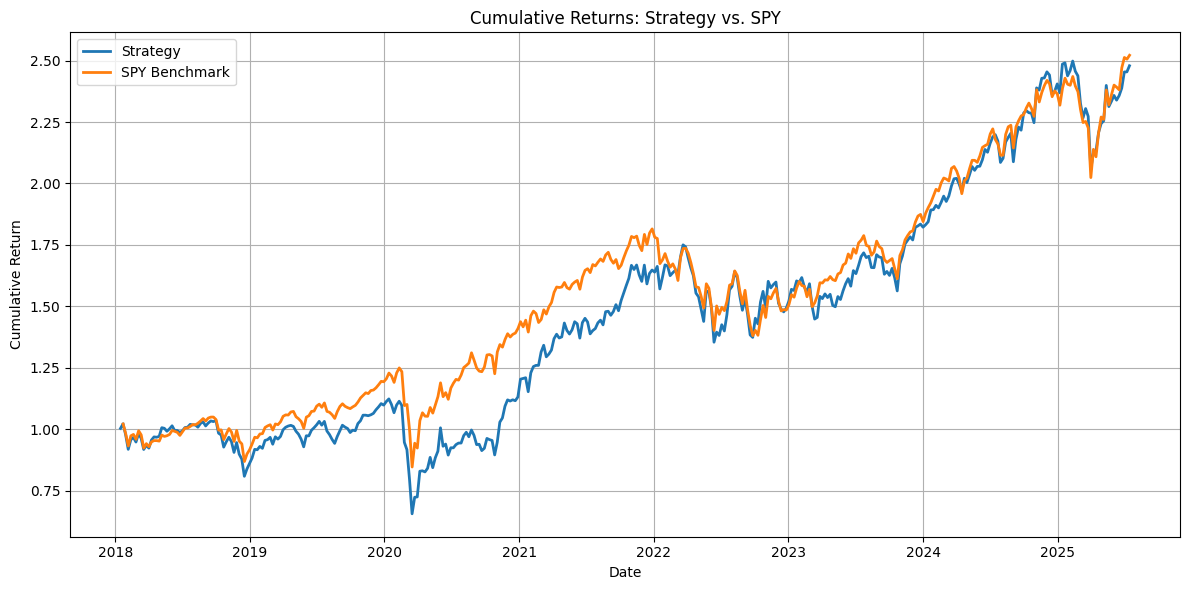

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(pf_price.index, pf_price, label="Strategy", linewidth=2)
plt.plot(bench_price.index, bench_price, label="SPY Benchmark", linewidth=2)
plt.title("Cumulative Returns: Strategy vs. SPY")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()